## PROJECT : Predicting Stock Prices using Stacked LSTM Model

OBJECTIVE: 

>To build a machine learning model that can accurately predict the future trend of stock prices and help investors make informed decisions.

<b> Steps Involved:
* Collection of Stock Data: AAPL (using API)
* Pre-process the Data - Train and Test
* Create an Stacked LSTM Model
* Predict on test data 
* Predict for future 30 days

_____________________

In [2]:
pip install pandas_datareader

     ------------------------------------ 109.5/109.5 kB 910.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\skyya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
## Importing the libraries :
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<!-- api_key ='9a04ac43dd149dfd59aa595eb6c1b2066b20942c' -->

In [4]:

df = pdr.get_data_tiingo('AAPL', api_key = 'api_key')
display(df.shape, df.tail())

(1258, 12)

close     high     low     open    volume  \
symbol date                                                                    
AAPL   2023-03-13 00:00:00+00:00  150.47  153.140  147.70  147.805  84457122   
       2023-03-14 00:00:00+00:00  152.59  153.400  150.10  151.280  73695893   
       2023-03-15 00:00:00+00:00  152.99  153.245  149.92  151.190  77167866   
       2023-03-16 00:00:00+00:00  155.85  156.460  151.64  152.160  76254419   
       2023-03-17 00:00:00+00:00  155.00  156.740  154.28  156.080  98944633   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2023-03-13 00:00:00+00:00    150.47  153.140  147.70  147.805   
       2023-03-14 00:00:00+00:00    152.59  153.400  150.10  151.280   
       2023-03-15 00:00:00+00:00    152.99  153.245  149.92  151.190   
       2023-03-16 00:00:00+00:00    155.85  156.460  151.64  152.160   
       2023-03-17 00:00:00+00:00    155.00  156.740  154.28  156.080   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-03-13 00:00:00+00:00   84457122      0.0          1.0  
       2023-03-14 00:00:00+00:00   73695893      0.0          1.0  
       2023-03-15 00:00:00+00:00   77167866      0.0          1.0  
       2023-03-16 00:00:00+00:00   76254419      0.0          1.0  
       2023-03-17 00:00:00+00:00   98944633      0.0          1.0

In [5]:
df2 = df.reset_index()['close']
df2.tail()

1253    150.47
1254    152.59
1255    152.99
1256    155.85
1257    155.00
Name: close, dtype: float64

Text(0.5, 1.0, 'Stock Price Movement')

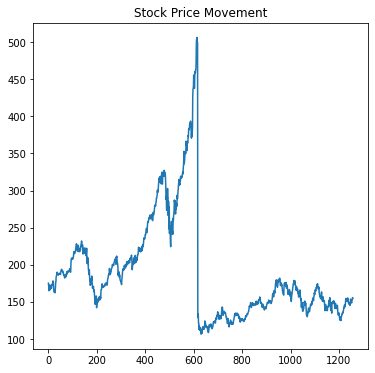

In [6]:
## Plot the closing value

plt.figure(figsize = (6,6))
plt.plot(df2)
plt.title('Stock Price Movement')


### <b> Standardizing the data:

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2.shape

(1258, 1)

### <b> Pre-processing the Data

In [8]:
# Splitting the data into Train and test Set:

# Its a time dependent data hence we can't choose training data randomly . 
# Hence we will choose initial 75% of data as traininig as rest as test.

train_df  = df2[:943,:]
test_df   = df2[944:,:]

In [9]:
## VERY IMPORTANT :

## Convert an array of values into a dataset matrix:

def make_dataset(dataset  , time_stamp = 1):
  x_data , y_data = [],[]
  for i in range(len(dataset)- time_stamp-1):
    a = dataset[i:(i+time_stamp), 0]
    x_data.append(a)
    y_data.append(dataset[i+time_stamp, 0])
  return np.array(x_data), np.array(y_data)

In [10]:
# Lets take a time stamp of 100:
time_stamp = 100
x_train, y_train  = make_dataset(train_df, time_stamp)
x_test, y_test      = make_dataset(test_df, time_stamp)

In [11]:
print(f''' 
TRAINING SHAPE :
      x_train: {x_train.shape}
      y_train: {y_train.shape}

TEST SHAPE :
      x_test: {x_test.shape}
      y_test: {y_test.shape}
''')

 
TRAINING SHAPE :
      x_train: (842, 100)
      y_train: (842,)

TEST SHAPE :
      x_test: (213, 100)
      y_test: (213,)



In [12]:
## reshaing the input data i.e. x_train and x_test into 3 dimensions which is required for LSTM model:
## [samples, timestamp, features]

x_train  = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test   = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [13]:
print(f''' 
TRAINING SHAPE :
      x_train: {x_train.shape}
      y_train: {y_train.shape}

TEST SHAPE :
      x_test: {x_test.shape}
      y_test: {y_test.shape}
''')

 
TRAINING SHAPE :
      x_train: (842, 100, 1)
      y_train: (842,)

TEST SHAPE :
      x_test: (213, 100, 1)
      y_test: (213,)



### CREATING STACKED LSTM MODEL

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [16]:
model = Sequential(name = "Stacked_LSTM_Model")
model.add(LSTM(50, return_sequences= True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# MODEL SUMMARY
model.summary()

Model: "Stacked_LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
## Training the model:

model.fit(x_train, y_train, validation_data= (x_test, y_test),epochs = 100)

Epoch 1/100
27/27 [==============================] - 13s 231ms/step - loss: 0.0209 - val_loss: 6.1554e-04
Epoch 2/100
27/27 [==============================] - 4s 159ms/step - loss: 0.0082 - val_loss: 9.5404e-04
Epoch 3/100
27/27 [==============================] - 4s 157ms/step - loss: 0.0076 - val_loss: 4.6571e-04
Epoch 4/100
27/27 [==============================] - 4s 160ms/step - loss: 0.0061 - val_loss: 0.0014
Epoch 5/100
27/27 [==============================] - 4s 164ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 6/100
27/27 [==============================] - 4s 159ms/step - loss: 0.0046 - val_loss: 8.2459e-04
Epoch 7/100
27/27 [==============================] - 4s 156ms/step - loss: 0.0038 - val_loss: 6.6088e-04
Epoch 8/100
27/27 [==============================] - 4s 159ms/step - loss: 0.0045 - val_loss: 3.7902e-04
Epoch 9/100
27/27 [==============================] - 4s 156ms/step - loss: 0.0030 - val_loss: 3.7501e-04
Epoch 10/100
27/27 [==============================] - 4s 161ms

In [18]:
## Lets perform the prediction on the test set and train set ::

train_predict = model.predict(x_train)
test_predict  = model.predict(x_test)

In [19]:
## Transforming it to original form:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [20]:
# Getting the ROOT MEAN SQUARED ERROR :
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

In [21]:
print (f'''
TRAIN RMSE : {train_rmse:.3f}
TEST  RMSE : {test_rmse:.3f}
''')


TRAIN RMSE : 213.568
TEST  RMSE : 149.443



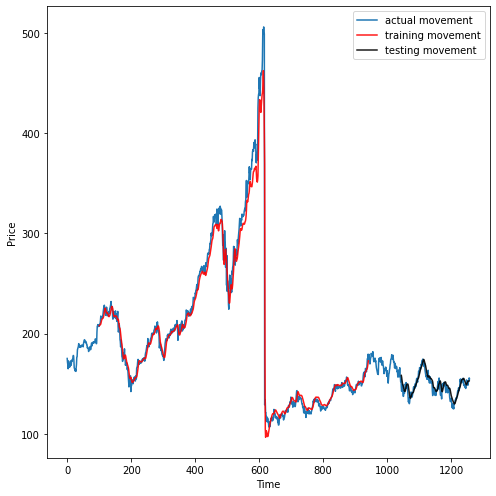

In [22]:
## PLOTTING THE DATA THAT WE GOT :
plt.figure(figsize = (7,7))

plt.plot(scaler.inverse_transform(df2), label = 'actual movement')

## shift train predictions for plotting 
time_stamp = 100
train_pred_plot = np.empty_like(df2)
train_pred_plot[:,:] = np.nan
train_pred_plot[time_stamp: len(train_predict)+time_stamp, :] = train_predict

plt.plot(train_pred_plot, color = 'red' , alpha = 0.9, label = 'training movement')

## shift test predictions for plotting 
test_pred_plot = np.empty_like(df2)
test_pred_plot[:,:] = np.nan
test_pred_plot[len(train_predict)+(time_stamp*2)+2 : len(df2)-1 , :] = test_predict

plt.plot(test_pred_plot, color = 'black' , alpha = 0.9, label = 'testing movement')
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.tight_layout()

## <b> FORECASTING THE PRICE(for next 30 days)

In [23]:
len(test_df)

314

In [24]:
x_input = test_df[214:].reshape(1,-1)  # This should be equal to 100 
(x_input.shape)

(1, 100)

In [25]:
temp_input  = list(x_input)
temp_input  = temp_input[0].tolist()

In [26]:
## PREDICTING FOR NEXT 30 Days:

In [27]:
model.predict(np.array(temp_input[:]).reshape(1,100,1))

array([[0.11927558]], dtype=float32)

In [28]:
lst_output  = []

i = 0
while i<30:

  if len(temp_input) > 100:
    x_in = np.array(temp_input[1:])
    x_in = x_in.reshape(1,-1)
    x_in = x_in.reshape(1,100,1)

    y_pred = model.predict(x_in, verbose = 0)
    print (f'Day {i+1} : {y_pred}')

    temp_input.extend(y_pred[0].tolist())
    temp_input = temp_input[1:]

    lst_output.extend(y_pred.tolist())

    i +=1

  else:
    x_in = x_input.reshape(1,100,1)
    y_pred = model.predict(x_in, verbose = 0)
    print (f'Day {i+1} : {y_pred}')
    temp_input.extend(y_pred[0].tolist())
    temp_input = temp_input
    lst_output.extend(y_pred.tolist())
    i +=1


Day 1 : [[0.11927558]]
Day 2 : [[0.12107066]]
Day 3 : [[0.12252843]]
Day 4 : [[0.12378336]]
Day 5 : [[0.12494103]]
Day 6 : [[0.12605762]]
Day 7 : [[0.12715615]]
Day 8 : [[0.12824345]]
Day 9 : [[0.1293199]]
Day 10 : [[0.13038439]]
Day 11 : [[0.13143551]]
Day 12 : [[0.13247234]]
Day 13 : [[0.13349423]]
Day 14 : [[0.1345008]]
Day 15 : [[0.13549197]]
Day 16 : [[0.13646773]]
Day 17 : [[0.13742824]]
Day 18 : [[0.13837382]]
Day 19 : [[0.1393048]]
Day 20 : [[0.14022163]]
Day 21 : [[0.14112464]]
Day 22 : [[0.14201431]]
Day 23 : [[0.14289108]]
Day 24 : [[0.14375529]]
Day 25 : [[0.14460728]]
Day 26 : [[0.14544731]]
Day 27 : [[0.1462757]]
Day 28 : [[0.14709264]]
Day 29 : [[0.1478983]]
Day 30 : [[0.14869285]]


In [29]:
len(df2)

1258

In [30]:
# Plotting 
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

df3 = df2.tolist()
df3.extend(lst_output)

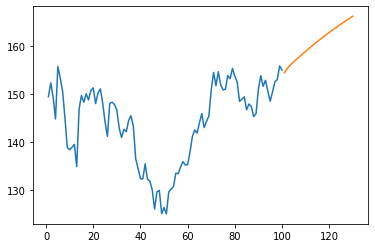

In [31]:
plt.plot(day_new, scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))